In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord, Angle
from astroquery.sdss import SDSS
import urllib
import IPython.display

%matplotlib inline

In [ ]:
cat_file='/Volumes/Data/Data/SDSS/DR9Q.fits'
hdu = fits.open(cat_file)
hdu.info()

cat_data=hdu[1].data
cat_data.columns

In [98]:
n=cat_data.size
gv=np.random.choice(n,10000, replace=False)

coo = SkyCoord(ra=cat_data['RA'][gv]*u.degree, dec=cat_data['DEC'][gv]*u.degree)
coo.galactic.l.degree

d = {'sdss_name':cat_data['SDSS_NAME'][gv], 'ra':cat_data['RA'][gv], 'dec':cat_data['DEC'][gv], 'l':coo.galactic.l.degree, 'b':coo.galactic.b.degree, 'z':cat_data['Z_PIPE'][gv], 'M_i':cat_data['MI'][gv], 'fwhm_CIV':cat_data['FWHM_CIV'][gv], 'fwhm_CIII':cat_data['FWHM_CIII'][gv], 'fwhm_MGII':cat_data['FWHM_MGII'][gv]}

data=pd.DataFrame(d, columns=['sdss_name', 'ra', 'dec', 'l', 'b', 'M_i','z','fwhm_CIV', 'fwhm_CIII','fwhm_MGII'])
data.to_csv('data/SDSS_quasars.csv')
data.head()

,sdss_name,ra,dec,l,b,M_i,z,fwhm_CIV,fwhm_CIII,fwhm_MGII
0,113845.19+423042.0,174.688292,42.511673,162.114365,68.662702,-25.592956,2.485653,3969.051744,22489.094201,-1.0
1,114731.72-010230.3,176.882208,-1.041761,271.734809,57.905934,-21.367217,0.563684,-1.000000,-1.000000,-1.0
2,153040.60+153944.4,232.669189,15.662352,23.989741,51.387337,-26.030400,2.780185,3830.811434,4700.819258,-1.0
3,221350.11+132943.5,333.458802,13.495429,74.652567,-34.216129,-25.999291,2.591368,2510.511683,2237.644373,-1.0
4,075149.76+332301.2,117.957347,33.383692,187.085103,26.389283,-25.648380,2.532235,6204.345819,7254.674581,-1.0


In [92]:
def plot_mwd(ra,dec,org=0,title='Mollweide projection', projection='mollweide'):
    x = np.remainder(ra+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x),np.radians(dec), marker='o', s=5, facecolor='green', edgecolor='', alpha=0.5)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

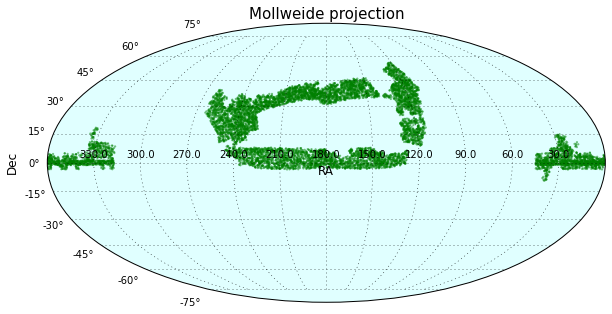

In [93]:
plot_mwd(data['ra'],data['dec'], org=180.)

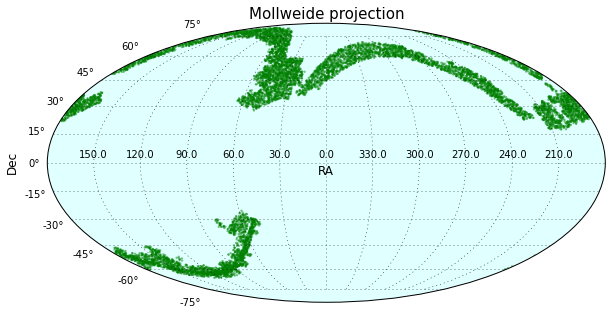

In [94]:
plot_mwd(data['l'],data['b'], org=0.)

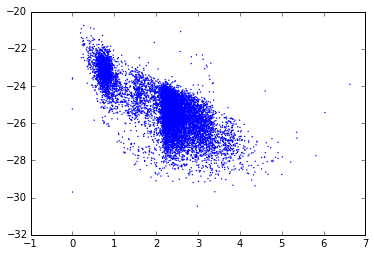

In [95]:
plt.scatter(data['z'],data['M_i'], edgecolor='', s=2)

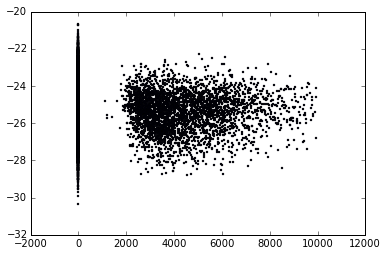

In [108]:
plt.scatter(data['fwhm_MGII'], data['M_i'], s=2)

(1000, 15000)

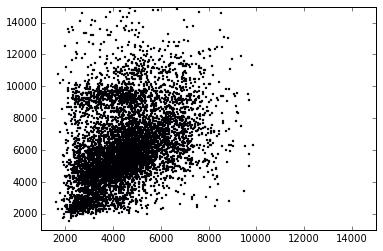

In [102]:
plt.scatter(data['fwhm_CIV'], data['fwhm_CIII'], s=2)
plt.xlim(1000,15000)
plt.ylim(1000,15000)

# Descarga del catalogo Galaxy Zoo

In [2]:
cat_file='/Volumes/Data/Data/GalaxyZoo/GalaxyZoo1_DR_table2.csv'
cat_data=pd.read_csv(cat_file)
cat_data.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [91]:
cat_data=cat_data.sort_values('P_EL_DEBIASED',ascending=0)
cat_elliptical=cat_data[cat_data['ELLIPTICAL']==1][0:15]
cat_elliptical['ra']=Angle(cat_elliptical['RA'], unit=u.hourangle).degree
cat_elliptical['dec']=Angle(cat_elliptical['DEC'], unit=u.degree).degree
cat_elliptical=cat_elliptical[['OBJID','ra','dec']].reset_index(drop=True)
cat_elliptical

,OBJID,ra,dec
0,587736584965390473,217.002375,37.400917
1,587739507152781464,180.871542,33.676028
2,587731522820636767,143.376417,47.961222
3,587739115235901848,122.157708,19.304333
4,587739156580073637,148.920208,30.761667
5,587736945739760066,250.556042,21.984722
6,587739406244642956,183.193750,34.269500
7,587728880874881168,148.919500,4.493944
8,587725470671700244,135.478375,55.065111
9,587725469056893217,126.571875,47.076222


In [92]:
coo=SkyCoord(cat_elliptical['ra'], cat_elliptical['dec'], unit=(u.deg,u.deg))
for i in range(len(coo)): #dx, coo in enumerate(coo_elliptical):
    print 'Processing galaxy ', i
    result = SDSS.query_region(coordinates=coo[i], 
                             spectro=True, 
                             photoobj_fields=['ra','dec','u','g','r','i','z'])
    if i==0:
        sdss_data=result
    else:
        sdss_data.add_row(np.array(result)[0])
        
cat_elliptical=pd.DataFrame(np.array(sdss_data))
cat_elliptical

Processing galaxy  0
Processing galaxy  1
Processing galaxy  2
Processing galaxy  3
Processing galaxy  4
Processing galaxy  5
Processing galaxy  6
Processing galaxy  7
Processing galaxy  8
Processing galaxy  9
Processing galaxy  10
Processing galaxy  11
Processing galaxy  12
Processing galaxy  13
Processing galaxy  14


,ra,dec,u,g,r,i,z
0,217.002390,37.400913,17.58736,15.60366,14.69556,14.28900,13.96379
1,180.871532,33.676015,19.57773,17.54818,16.22724,15.72687,15.42532
2,143.376448,47.961210,19.24883,17.25740,15.95120,15.50748,15.08461
3,122.157713,19.304330,18.78819,16.79565,15.86990,15.43240,15.10621
4,148.920224,30.761665,20.48265,18.37696,17.03156,16.53907,16.18664
5,250.556037,21.984739,20.13382,18.01895,16.80676,16.32159,15.92186
6,183.193739,34.269499,18.89390,16.90068,15.90126,15.47297,15.11380
7,148.919480,4.493942,20.81122,18.80297,17.57092,17.07555,16.72780
8,135.478406,55.065119,18.74596,16.75307,15.86211,15.41807,15.08230
9,126.571865,47.076243,19.88142,17.80997,16.72737,16.24957,15.88377


In [102]:
impix = 320
imsize = 1*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'

coo=SkyCoord(cat_elliptical['ra'], cat_elliptical['dec'], unit=(u.deg,u.deg))
for i in range(len(coo)):
    print 'Processing galaxy '+str(i)
    query_string = urllib.urlencode(dict(ra=coo[i].ra.deg, 
                                         dec=coo[i].dec.deg, 
                                         width=impix, height=impix, 
                                         scale=imsize.to(u.arcsec).value/impix))
    url = cutoutbaseurl + '?' + query_string

    urllib.urlretrieve(url, 'SDSS_cutout_elliptical_'+str(i)+'.jpg')

Processing galaxy 0
Processing galaxy 1
Processing galaxy 2
Processing galaxy 3
Processing galaxy 4
Processing galaxy 5
Processing galaxy 6
Processing galaxy 7
Processing galaxy 8
Processing galaxy 9
Processing galaxy 10
Processing galaxy 11
Processing galaxy 12
Processing galaxy 13
Processing galaxy 14


In [111]:
cat_elliptical.to_csv('SDSS_galaxyzoo_elliptical.csv',index=False)

In [109]:
np.mean(cat_elliptical['u']-cat_elliptical['r'])

3.0623933333333326

### Now the spiral galaxies

In [106]:
cat_data=cat_data.sort_values('P_CS_DEBIASED',ascending=0)
cat_spiral=cat_data[cat_data['SPIRAL']==1][0:15]
cat_spiral['ra']=Angle(cat_spiral['RA'], unit=u.hourangle).degree
cat_spiral['dec']=Angle(cat_spiral['DEC'], unit=u.degree).degree
cat_spiral=cat_spiral[['OBJID','ra','dec']].reset_index(drop=True)
cat_spiral

,OBJID,ra,dec
0,587724233176449214,14.559458,15.200250
1,587739708492480751,236.819667,20.441333
2,587728308028440738,168.204917,1.874194
3,587739828740489465,219.929042,23.656250
4,587725993040740590,255.074458,38.392750
5,587739844856119447,239.705417,14.969194
6,587742572684247158,167.414875,19.294694
7,588013382720749656,119.480750,28.046056
8,587742191512387725,176.343292,25.647083
9,587734893288161361,175.690667,10.288389


In [107]:
coo=SkyCoord(cat_spiral['ra'], cat_spiral['dec'], unit=(u.deg,u.deg))
for i in range(len(coo)): #dx, coo in enumerate(coo_elliptical):
    print 'Processing galaxy ', i
    result = SDSS.query_region(coordinates=coo[i],
                               spectro=True, 
                               photoobj_fields=['ra','dec','u','g','r','i','z'])
    print result
    if i==0:        
        sdss_data=result
    else:
        sdss_data.add_row(np.array(result)[0])
        
cat_spiral=pd.DataFrame(np.array(sdss_data))
cat_spiral

Processing galaxy  0
      ra           dec         u        g        r       i       z    
------------- ------------- -------- -------- ------- ------- --------
14.5594861411 15.2002534257 19.02797 17.08535 16.0903 15.5504 15.12846
Processing galaxy  1
     ra           dec         u        g        r        i        z    
------------ ------------- -------- -------- -------- -------- --------
236.81967465 20.4413238449 17.75722 16.36159 15.66167 15.24168 14.95334
Processing galaxy  2
      ra           dec         u        g        r        i       z    
------------- ------------- -------- -------- -------- ------- --------
168.204905024 1.87419891548 20.25491 18.56362 17.60125 17.0838 16.71185
Processing galaxy  3
      ra           dec         u        g        r        i        z    
------------- ------------- -------- -------- -------- -------- --------
219.929026308 23.6562533352 19.02137 17.85595 17.41455 17.10028 16.89018
Processing galaxy  4
      ra           dec         

,ra,dec,u,g,r,i,z
0,14.559486,15.200253,19.02797,17.08535,16.09030,15.55040,15.12846
1,236.819675,20.441324,17.75722,16.36159,15.66167,15.24168,14.95334
2,168.204905,1.874199,20.25491,18.56362,17.60125,17.08380,16.71185
3,219.929026,23.656253,19.02137,17.85595,17.41455,17.10028,16.89018
4,255.074418,38.392734,17.40394,16.02719,15.52810,15.22465,15.02496
5,239.705422,14.969193,18.37152,17.46466,17.31059,17.49466,17.23945
6,167.414887,19.294677,19.30394,18.09272,17.70576,17.45160,17.36353
7,119.480724,28.046045,19.35499,17.70389,17.13966,16.85838,16.71841
8,176.343264,25.647088,18.71480,17.46571,16.77394,16.43784,16.16055
9,175.690673,10.288394,17.75298,16.77014,16.13074,15.73672,15.51232


In [108]:
impix = 320
imsize = 1*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'

coo=SkyCoord(cat_spiral['ra'], cat_spiral['dec'], unit=(u.deg,u.deg))
for i in range(len(coo)):
    print 'Processing galaxy '+str(i)
    query_string = urllib.urlencode(dict(ra=coo[i].ra.deg, 
                                         dec=coo[i].dec.deg, 
                                         width=impix, height=impix, 
                                         scale=imsize.to(u.arcsec).value/impix))
    url = cutoutbaseurl + '?' + query_string

    urllib.urlretrieve(url, 'SDSS_cutout_spiral_'+str(i)+'.jpg')

Processing galaxy 0
Processing galaxy 1
Processing galaxy 2
Processing galaxy 3
Processing galaxy 4
Processing galaxy 5
Processing galaxy 6
Processing galaxy 7
Processing galaxy 8
Processing galaxy 9
Processing galaxy 10
Processing galaxy 11
Processing galaxy 12
Processing galaxy 13
Processing galaxy 14


In [112]:
cat_spiral.to_csv('SDSS_galaxyzoo_spiral.csv',index=False)

In [110]:
np.mean(cat_spiral['u']-cat_spiral['r'])

2.1193400000000002

In [168]:
cat_full=cat_elliptical.append(cat_spiral).reset_index(drop=True)
im_full=[prefix+str(i)+'.jpg' for prefix in ('SDSS_cutout_elliptical_','SDSS_cutout_spiral_') for i in range(15)]
print cat_full
print im_full

gv=np.arange(30)
np.random.shuffle(gv)
print gv

            ra        dec         u         g         r         i         z
0   217.002390  37.400913  17.58736  15.60366  14.69556  14.28900  13.96379
1   180.871532  33.676015  19.57773  17.54818  16.22724  15.72687  15.42532
2   143.376448  47.961210  19.24883  17.25740  15.95120  15.50748  15.08461
3   122.157713  19.304330  18.78819  16.79565  15.86990  15.43240  15.10621
4   148.920224  30.761665  20.48265  18.37696  17.03156  16.53907  16.18664
5   250.556037  21.984739  20.13382  18.01895  16.80676  16.32159  15.92186
6   183.193739  34.269499  18.89390  16.90068  15.90126  15.47297  15.11380
7   148.919480   4.493942  20.81122  18.80297  17.57092  17.07555  16.72780
8   135.478406  55.065119  18.74596  16.75307  15.86211  15.41807  15.08230
9   126.571865  47.076243  19.88142  17.80997  16.72737  16.24957  15.88377
10  235.647922  23.670054  15.98356  14.07919  13.22432  12.81408  12.48401
11  166.247425  30.107216  17.82685  16.16346  15.37921  15.00173  14.74016
12  185.7543

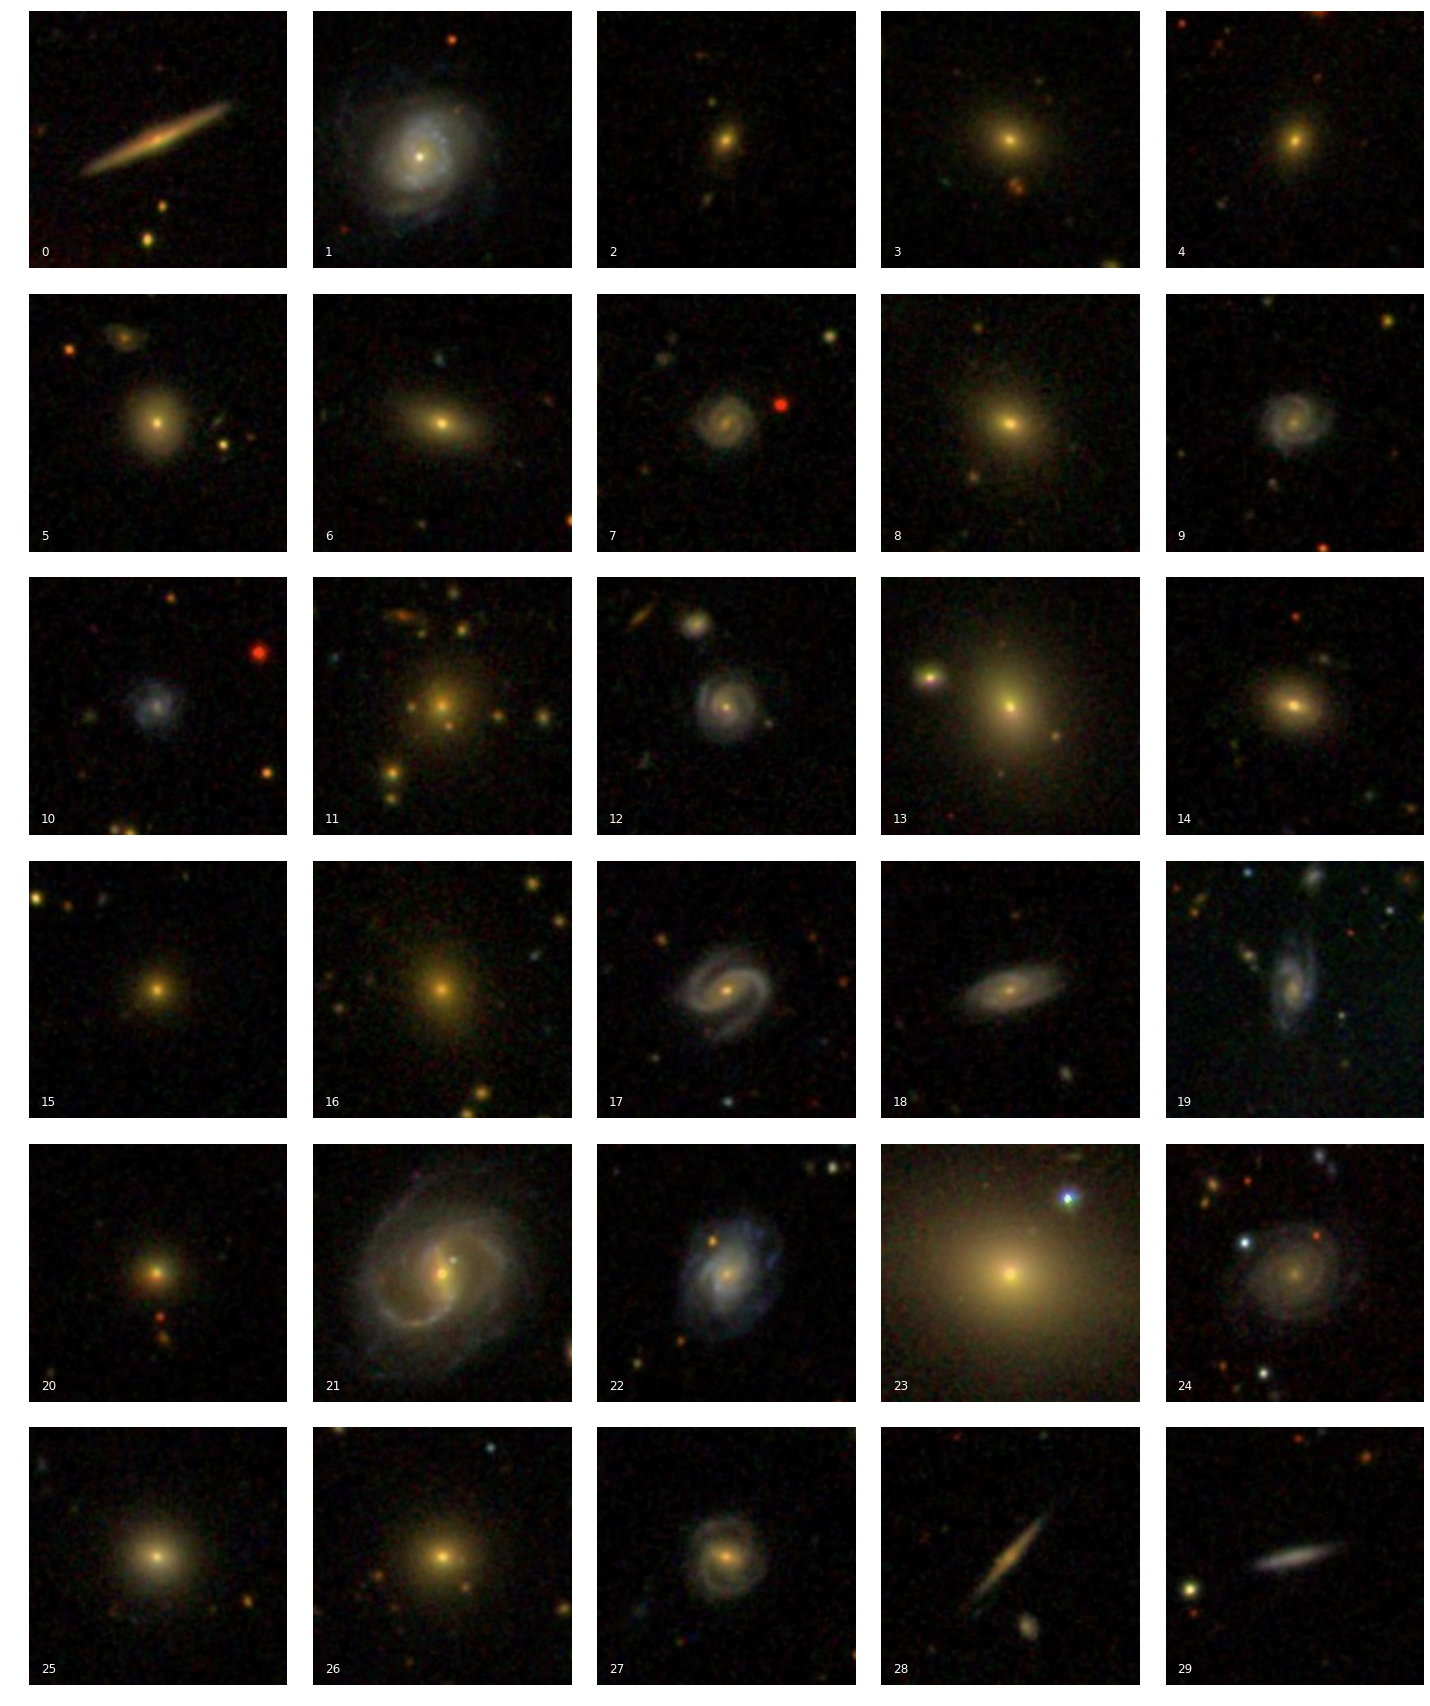

In [176]:
from scipy.misc import imread, imsave

fig, ax = plt.subplots(figsize=(25,30), sharex=True, sharey=True)
for i in range(30):
    ax = plt.subplot(6,5,i+1)
    im_file=im_full[gv[i]]
    im_data=imread(im_file)
    ax.imshow(im_data)
    ax.axis('off')
    ax.text(0.05,0.05, str(i), transform=ax.transAxes, color='white', fontsize=12)

fig.subplots_adjust(hspace=0.1, wspace=0.1)
fig.savefig('SDSS_morfologia.jpg', bbox_inches='tight', pad_inches=0)

In [186]:
cat_full.iloc[gv]

,ra,dec,u,g,r,i,z
15,14.559486,15.200253,19.02797,17.08535,16.09030,15.55040,15.12846
20,239.705422,14.969193,18.37152,17.46466,17.31059,17.49466,17.23945
7,148.919480,4.493942,20.81122,18.80297,17.57092,17.07555,16.72780
14,168.413512,59.293458,19.23900,17.28332,16.19314,15.72651,15.35783
5,250.556037,21.984739,20.13382,18.01895,16.80676,16.32159,15.92186
3,122.157713,19.304330,18.78819,16.79565,15.86990,15.43240,15.10621
6,183.193739,34.269499,18.89390,16.90068,15.90126,15.47297,15.11380
29,160.539544,65.101534,19.07532,17.75013,16.90090,16.48999,16.16319
12,185.754353,61.707158,18.70965,16.63571,15.61255,15.16839,14.79017
23,176.343264,25.647088,18.71480,17.46571,16.77394,16.43784,16.16055


In [185]:
(cat_full.iloc[gv]).to_csv('SDSS_galaxyzoo_morfologia.csv',index=False)

In [193]:
a=[1,2,3]
cat_full['u'].iloc[a]+2

21.204916666666666